Resources:
1. https://saedsayad.com/decision_tree_reg.htm

Task Description:
1.   Your task is to perform gradient boosting to predict the target column in the following small dataset
2.   Complete the decision tree class
3.   Then complete the driver code of the gradient boosting algorithm
4.   From the given image, create dataframes or numpy arrays for X and y



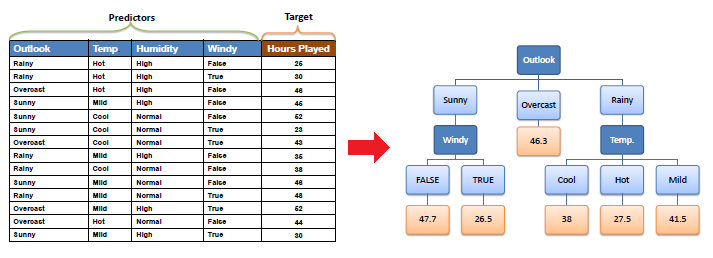

In [ ]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
data = pd.DataFrame({'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
                        'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
                        'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
                        'Windy': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True'],
                        'Play': ['25', '30', '46', '45', '52', '23', '43', '35', '38', '46', '48', '52', '44', '30']
                        })

X = data.drop(['Play'], axis=1)
y = data['Play']
from sklearn.model_selection import train_test_split
X_train = X
y_train = y
!pip install category_encoders
import category_encoders as ce
# encode categorical variables with ordinal encoding
# encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
# tencoder = ce.OrdinalEncoder(cols = ['class'])
encoder = ce.OrdinalEncoder(cols=['Outlook', 'Temperature', 'Humidity', 'Windy'])
#tencoder = ce.OrdinalEncoder(cols = ['Play'])
X_train = encoder.fit_transform(X_train)
#y_train = tencoder.fit_transform(y_train)
# X_test = encoder.transform(X_test)
# y_test = tencoder.transform(y_test)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
# X_test = X_test.to_numpy()
# y_test = y_test.to_numpy()

**Decision Tree For Regression**

In [41]:
class DecisionTree():
  def __init__(self, _X, _y, _attributes, map):
    self.X = _X
    self.y = _y
    self.attributes = _attributes
    self.decision = None
    self.dictionary = {}
    self.attribute_name = ""
    self.feature_map = map



  def standard_deviation(self, arr):
    # you will pass an array here. For example [1, 2, 4, 7]. Then you need to return the standard deviation. In this case, it is 2.2912878474779
    #Find out how to calculate it. https://en.wikipedia.org/wiki/Standard_deviation
    arr = np.array(arr, dtype=float)
    avg= sum(arr)/len(arr)
    sq_diff= [(i-avg)**2 for i in arr]
    std_dev= (sum(sq_diff)/ len(arr))**0.5
    return std_dev



  def find_best_attribute(self):
    std = self.standard_deviation(self.y)
    std_reduction = float('inf')
    best_attribute = None

    for attr in self.attributes:
      column_index = self.attributes.index(attr)
      unique_vals = set(self.X[:, column_index])
      std_of_attr = 0

      for val in unique_vals:
        column_index = self.attributes.index(attr)
        dataset_val_mask = self.X[:, column_index] == val
        dataset_val_x = self.X[dataset_val_mask]
        dataset_val_y = self.y[dataset_val_mask]
        std_val = self.standard_deviation(dataset_val_y)
        std_of_attr += (len(dataset_val_y) / len(self.y)) * std_val
        std_reduction_of_attr = std - std_of_attr

        if std_reduction_of_attr < std_reduction:
          std_reduction = std_reduction_of_attr
          best_attribute = attr

    return best_attribute




  def build(self, feats):
    #if dataset size is less than or equal to 3 or if the coefficient of deviation (CV) is less than 10%, then make it a leaf and the target value should be the average
    #best_f = self.find_best_attribute()
    #if best_f has values {a, b, c,... }
    #then split the dataset according to the values a, b, c, .....
    #the X of dataset_a will be called dataset_a_X and the y of dataset_a will be called dataset_a_y
    #all of these datasets will have all the attributes except for the best_f
    #with each of the datasets, create a child decision tree and let's say their hypothetical names are child_a, child_b, child_c
    #declare child decision trees. For example, child_a = DecisionTree(dataset_a_X, dataset_a_Y, dataset_a_attributes, dataset_a_map)
    #call the build function for each of these. For example: child_a.build(dataset_a_attributes)
    #the current self node will contain these children decision trees as follows
    # self.dictionary = {a: child_a, b: child_b, c: child_c, ......}
   pass

  def predict(self, x):
    # if self.decision is not None, then return self.decision
    # x is an dictionary of values. For example x = ['Outlook':'Sunny', 'Temp': 'Mild', 'Humidity':'High', 'Windy':'False']
    # lets say this particular node is split according to Temp
    # Temp let's say temp has three values Hot, Mild, Cool in this node. The map of this node maps these to a, b, c.
    # Since Temp = Mild in x, we need to go to child_b
    # return child_b.predict(x)
    pass

  def print_the_tree(self, level):
    print(len(self.attributes))
    if self.decision is not None:
      print('The decision is : ', self.decision)
      return

    print('At level: ', level, self.attribute_name)
    for key in self.dictionary:
      self.dictionary[key].print_the_tree(level + 1)


**Gradient Boosting**

In [ ]:
# avg_hours_played = average of all the hours played
# residue = hours_played - average_hours_played

# alpha = 0.1
# iterations = 100
# attributes = ['Outlook', 'Temp', 'Humidity', 'Windy']
# map = {'Outlook': 0, 'Temp':1, 'Humidity':2, 'Windy':3}
# reverse_map = {0:'Outlook', 1:'Temp', 2:'Humidity', 3:'Windy'}
# prediction = avg_hours_played

# for iter in range(iterations):
#     y = residue
#     dt = decision_tree(X, y, attributes, map or reverse_map whichever you prefer to use)
#     residue_prediction = predictions for all the instances in X
#     prediction = prediction + alpha * residue_prediction
#     residue = hours_played - prediction

# print prediction
# also print the mean squared error


In [42]:
feats = ['Outlook', 'Temperature', 'Windy', 'Humidity']
map = {'Outlook':0, 'Temperature':1, 'Windy':2, 'Humidity':3}
dt = DecisionTree(X_train, y_train, feats , map)
dt.standard_deviation(np.array([1,2,4,7]))
dt.find_best_attribute()

'Windy'